In [169]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sm

In [171]:
manual_input = pd.read_excel('Analysis.xlsx',sheet_name='Analysis')
manual_input.head(3)

,Number,Age,Year,Month,Region,Country,Reason,Avg. Temp.,Humidity%,Waether
0,1,0-7,2012,7,East of England,Hertfordshire,Not Listed-Systemic,17.4,69,Heatwave
1,2,0-7,2012,9,West Midlands,Warwickshire,Yolk sac infection/omphalitis,14.0,78,Showers
2,3,0-7,2013,1,West Midlands,Staffordshire,Colisepticaemia,2.9,88,"Snow, freezing fog"


In [173]:
manual_input.shape

(440, 10)

In [179]:
pie_chart_region=pd.read_excel('Analysis.xlsx',sheet_name='Region')
pie_chart_region.head(3)

,region,death
0,East of England,78
1,West Midlands,33
2,Scotland,174


<function matplotlib.pyplot.show(close=None, block=None)>

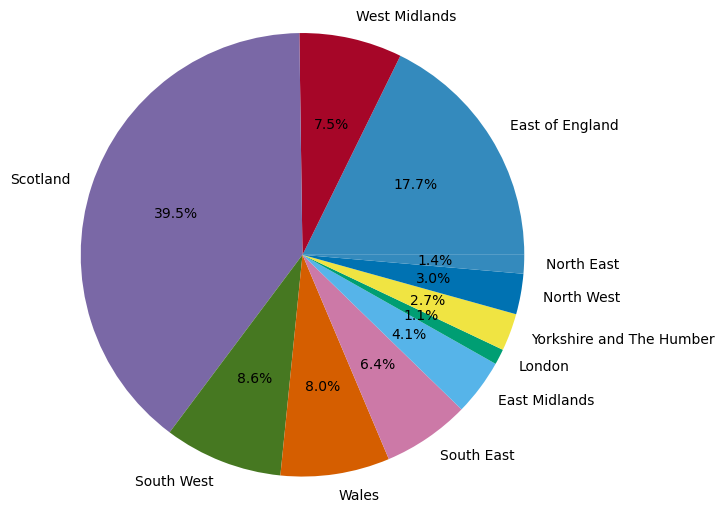

In [181]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.xlabel
plt.pie(pie_chart_region['death'], labels=pie_chart_region['region'], radius=1.5,autopct='%0.01f%%')
plt.show

In [185]:
pie_chart_month=pd.read_excel('Analysis.xlsx',sheet_name='Monthly death')
pie_chart_month.head(3)

,month,death,season
0,1,33,winter
1,2,18,winter
2,3,29,spring


<function matplotlib.pyplot.show(close=None, block=None)>

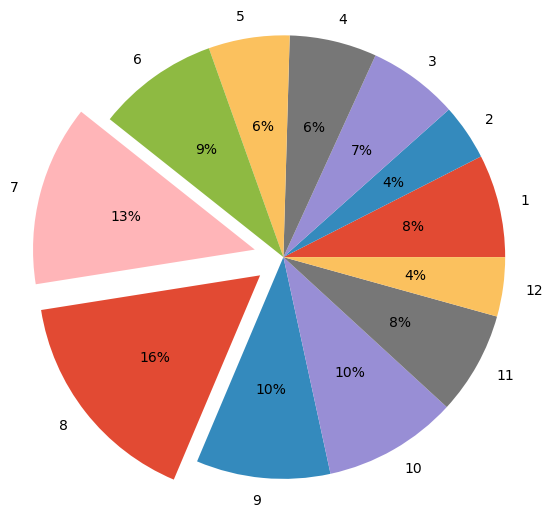

In [187]:
plt.style.use('ggplot')
plt.pie(pie_chart_month['death'], labels=pie_chart_month['month'], radius=1.5, autopct='%1.0f%%', explode=[0,0,0,0,0,0,0.2,0.2,0,0,0,0])
plt.show

Text(0, 0.5, 'Total Deaths')

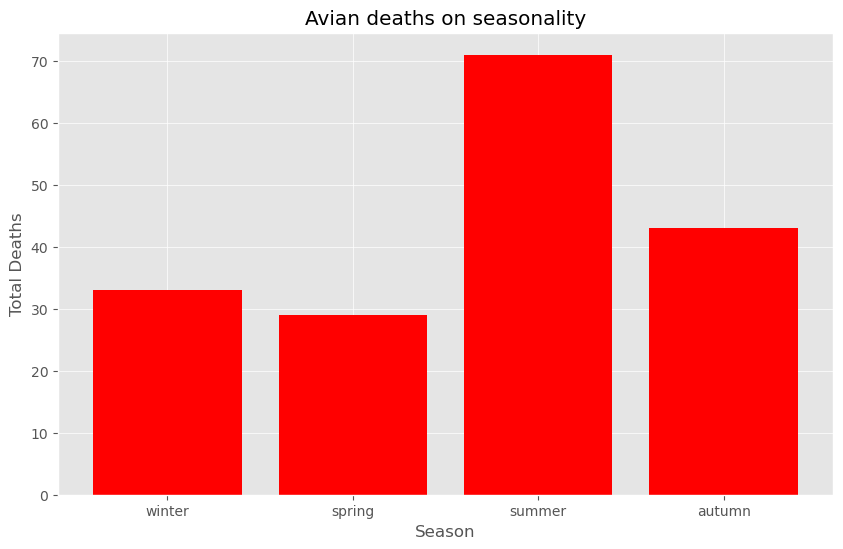

In [189]:
plt.figure(figsize=(10, 6))
plt.bar(pie_chart_month['season'], pie_chart_month['death'], color='red')
plt.title('Avian deaths on seasonality')
plt.xlabel('Season')
plt.ylabel('Total Deaths')

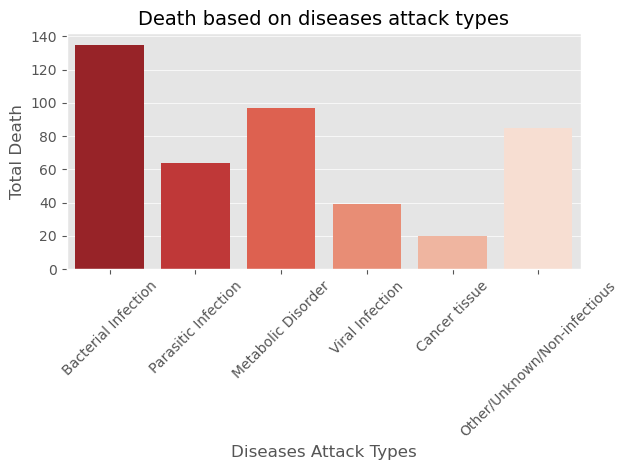

In [191]:
import seaborn as sns
barch_diseases=pd.read_excel('Analysis.xlsx',sheet_name='Clinical Diagnosis Sum')
barch_diseases.head()
sns.barplot(data=barch_diseases, x="diseases_types", y="total_death",hue="diseases_types", palette="Reds_r")
plt.title("Death based on diseases attack types", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Total Death")
plt.xlabel("Diseases Attack Types")
plt.tight_layout()
plt.show()

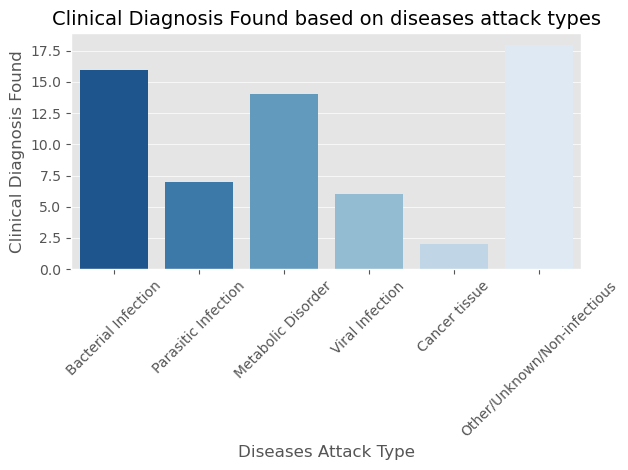

In [192]:
sns.barplot(data=barch_diseases, x="diseases_types", y="num_of_diseases",hue="diseases_types", palette="Blues_r")
plt.title("Clinical Diagnosis Found based on diseases attack types", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Clinical Diagnosis Found")
plt.xlabel("Diseases Attack Type")
plt.tight_layout()
plt.show()

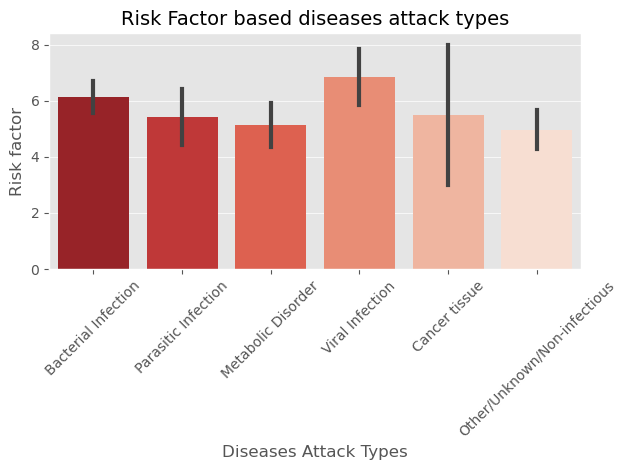

In [194]:
risk_factor=pd.read_excel('Analysis.xlsx',sheet_name='Clinical Diagnosis')
risk_factor.head()
sns.barplot(data=risk_factor, x="diseases_types", y="risk_factor",hue="diseases_types", palette="Reds_r")
plt.title("Risk Factor based diseases attack types", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Risk factor")
plt.xlabel("Diseases Attack Types")
plt.tight_layout()
plt.show()

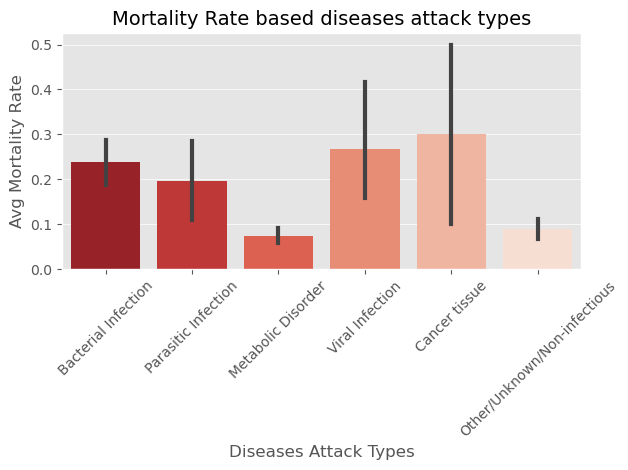

In [196]:
sns.barplot(data=risk_factor, x="diseases_types", y="mortality_rate",hue="diseases_types", palette="Reds_r")
plt.title("Mortality Rate based diseases attack types", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Avg Mortality Rate")
plt.xlabel("Diseases Attack Types")
plt.tight_layout()
plt.show()

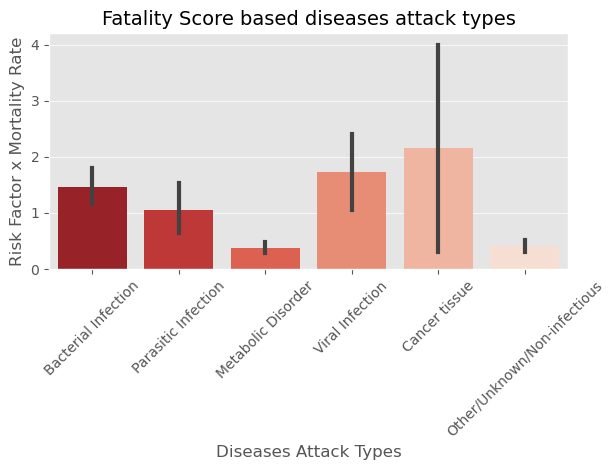

In [197]:
sns.barplot(data=risk_factor, x="diseases_types", y="rxm_prod",hue="diseases_types", palette="Reds_r")
plt.title("Fatality Score based diseases attack types", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Risk Factor x Mortality Rate")
plt.xlabel("Diseases Attack Types")
plt.tight_layout()
plt.show()

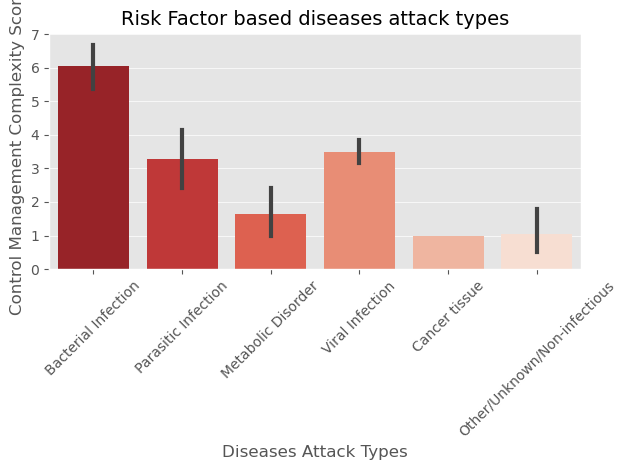

In [199]:
sns.barplot(data=risk_factor, x="diseases_types", y="cm_complexity_level",hue="diseases_types", palette="Reds_r")
plt.title("Risk Factor based diseases attack types", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Control Management Complexity Score")
plt.xlabel("Diseases Attack Types")
plt.tight_layout()
plt.show()

In [201]:
data = pd.read_excel('Analysis.xlsx',sheet_name='Seasonality')
data.head()

,region,month,avg_temp,avg_hum,avg_death,total_death,num_of_diagnosis,num_of_diseases_types,infectious,non_infectious,remedy_unavail_score,cm_complexity_level,fatality_score
0,East of England,1,4.09,87.00,0.64,9,7,5,4,3,15,21,7.12
1,East of England,2,4.78,84.64,0.36,5,5,3,2,3,15,12,4.09
2,East of England,3,7.50,80.64,0.29,4,4,3,1,3,30,8,7.48
3,East of England,4,9.63,78.50,0.43,6,6,4,1,5,25,10,8.66
4,East of England,5,11.96,70.36,0.21,3,2,2,1,1,10,8,5.40


count    132.000000
mean       3.333333
std        4.906246
min        0.000000
25%        0.750000
50%        2.000000
75%        4.000000
max       29.000000
Name: total_death, dtype: float64

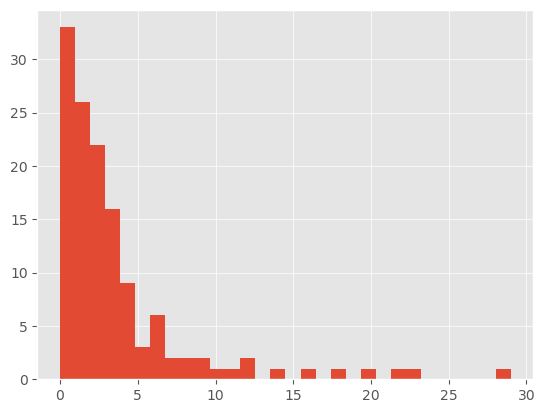

In [202]:
data['total_death'].hist(bins=30)
data['total_death'].describe()

In [204]:
data.columns = data.columns.str.strip()

In [205]:
feature_cols = ['avg_temp', 'avg_hum', 'avg_death', 'total_death', 'num_of_diagnosis', 'num_of_diseases_types', 'infectious', 'non_infectious', 'remedy_unavail_score', 'cm_complexity_level', 'fatality_score']
feature_means = data[feature_cols].mean()
data['high_risk'] = data[feature_cols].gt(feature_means).sum(axis=1).ge(6).astype(int)
data.head()

,region,month,avg_temp,avg_hum,avg_death,total_death,num_of_diagnosis,num_of_diseases_types,infectious,non_infectious,remedy_unavail_score,cm_complexity_level,fatality_score,high_risk
0,East of England,1,4.09,87.00,0.64,9,7,5,4,3,15,21,7.12,1
1,East of England,2,4.78,84.64,0.36,5,5,3,2,3,15,12,4.09,1
2,East of England,3,7.50,80.64,0.29,4,4,3,1,3,30,8,7.48,1
3,East of England,4,9.63,78.50,0.43,6,6,4,1,5,25,10,8.66,1
4,East of England,5,11.96,70.36,0.21,3,2,2,1,1,10,8,5.40,0


In [208]:
data.describe()

,month,avg_temp,avg_hum,avg_death,total_death,num_of_diagnosis,num_of_diseases_types,infectious,non_infectious,remedy_unavail_score,cm_complexity_level,fatality_score,high_risk
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,6.500000,10.804242,78.863409,0.237197,3.333333,2.590909,1.765152,1.325758,1.265152,3.863636,8.174242,3.654848,0.318182
std,3.465203,4.654611,6.248221,0.350758,4.906246,3.061593,1.471665,1.550652,1.823761,6.496943,10.026298,5.212905,0.467545
min,1.000000,3.010000,64.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,6.567500,74.375000,0.052500,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000,0.060000,0.000000
50%,6.500000,10.380000,78.750000,0.140000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,6.000000,2.215000,0.000000
75%,9.250000,15.025000,84.307500,0.290000,4.000000,3.000000,3.000000,2.000000,2.000000,5.000000,11.000000,4.930000,1.000000
max,12.000000,19.350000,88.790000,2.070000,29.000000,17.000000,5.000000,8.000000,11.000000,30.000000,54.000000,28.250000,1.000000


<Axes: >

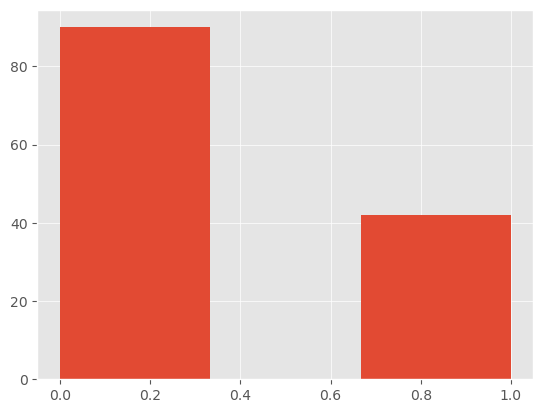

In [212]:
data['high_risk'].hist(bins=3)

In [217]:
# Prepare input features and target
X = data[feature_cols]
y = data['high_risk']

In [218]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.44798795,  1.30718614,  1.15275428, ...,  1.72062272,
         1.28408484,  0.66725795],
       [-1.29918312,  0.92803972,  0.35144154, ...,  1.72062272,
         0.3830259 ,  0.08379383],
       [-0.71259018,  0.28541868,  0.15111336, ...,  4.03819618,
        -0.01744474,  0.73658042],
       ...,
       [-0.03973357,  0.76738446, -0.07783314, ..., -0.59695074,
         0.68337888,  0.30716623],
       [-0.72768632,  1.21561264, -0.67881769, ..., -0.59695074,
        -0.81838603, -0.70378645],
       [-1.05764485,  1.36502204, -0.67881769, ..., -0.59695074,
        -0.81838603, -0.70378645]])

In [222]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

nb_model = GaussianNB()
svm_model = SVC(kernel='linear')
rf_model = RandomForestClassifier(random_state=42)

kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)


nb_cv_scores = cross_val_score(nb_model, X_scaled, y, cv=kfold, scoring='f1')
svm_cv_scores = cross_val_score(svm_model, X_scaled, y, cv=kfold, scoring='f1')
rf_cv_scores = cross_val_score(rf_model, X_scaled, y, cv=kfold, scoring='f1')

results_f1_score = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest', 'SVM'],
    'F1 Score (4-fold CV)': [nb_cv_scores.mean(), rf_cv_scores.mean(), svm_cv_scores.mean()]
})

# Format the F1 scores to 4 decimal places
results_f1_score['F1 Score (4-fold CV)'] = results_f1_score['F1 Score (4-fold CV)'].map('{:.4f}'.format)

# Style the DataFrame for better display
display(results_f1_score.style.format({'F1 Score': '{:.4f}'}).set_caption('Model Comparison (4-fold CV)'))

,Model,F1 Score (4-fold CV)
0,Naive Bayes,0.9654
1,Random Forest,0.9630
2,SVM,0.9380


In [223]:
#Train-test split for detailed evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

In [225]:
# Train the model and make predictions
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)
# Evaluation metrics
print("NB Classification Report:")
print(classification_report(y_test, nb_y_pred))

nb_roc_score = roc_auc_score(y_test, nb_y_pred)
print(f"ROC AUC Score: {nb_roc_score:.4f}")

NB Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        10

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

ROC AUC Score: 1.0000


In [229]:
# Train and predict
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

# Evaluation
print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))

svm_roc_score = roc_auc_score(y_test, svm_y_pred)
print(f"SVM ROC AUC Score: {svm_roc_score:.4f}")

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.80      0.89        10

    accuracy                           0.94        33
   macro avg       0.96      0.90      0.92        33
weighted avg       0.94      0.94      0.94        33

SVM ROC AUC Score: 0.9000


In [231]:
# Train model
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

rf_roc_score = roc_auc_score(y_test, rf_y_pred)
print(f"Random Forest ROC AUC Score: {rf_roc_score:.4f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        23
           1       1.00      0.70      0.82        10

    accuracy                           0.91        33
   macro avg       0.94      0.85      0.88        33
weighted avg       0.92      0.91      0.90        33

Random Forest ROC AUC Score: 0.8500


In [233]:
from sklearn.svm import LinearSVC

# Train model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Get feature weights
feature_names = X.columns.tolist()
weights = svm_model.coef_[0].tolist()
weights_abs = [abs(w) for w in weights]

# Combine and sort
sorted_features = sorted(zip(weights_abs, feature_names), reverse=True)

# Display
print("Feature Importance (Linear SVM):")
for w, name in sorted_features:
    print(f"{name}: {w:.4f}")


Feature Importance (Linear SVM):
fatality_score: 1.1262
cm_complexity_level: 0.8276
non_infectious: 0.8249
avg_temp: 0.6125
num_of_diagnosis: 0.6013
avg_death: 0.5010
avg_hum: 0.4602
total_death: 0.4402
remedy_unavail_score: 0.3394
infectious: 0.2169
num_of_diseases_types: 0.1740


In [235]:
# Re-import necessary libraries due to code execution environment reset
import pandas as pd
# Group by region to analyze high risk occurrences
region_risk = data.groupby("region")["high_risk"].agg(['count', 'sum'])
region_risk["high_risk_rate"] = region_risk["sum"] / region_risk["count"]
region_risk = region_risk.rename(columns={'count': 'total_cases', 'sum': 'high_risk_cases'})

region_risk.sort_values(by="high_risk_rate", ascending=False, inplace=True)
region_risk.reset_index(inplace=True)

region_risk

,region,total_cases,high_risk_cases,high_risk_rate
0,Scotland,12,12,1.000000
1,East of England,12,8,0.666667
2,Wales,12,6,0.500000
3,South East,12,4,0.333333
4,South West,12,4,0.333333
5,West Midlands,12,4,0.333333
6,East Midlands,12,2,0.166667
7,North East,12,1,0.083333
8,Yorkshire and The Humber,12,1,0.083333
9,London,12,0,0.000000


C:\Users\tajdi\AppData\Local\Temp\ipykernel_22416\1792061957.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_risk, x="region", y="high_risk_rate", palette="Reds_r")


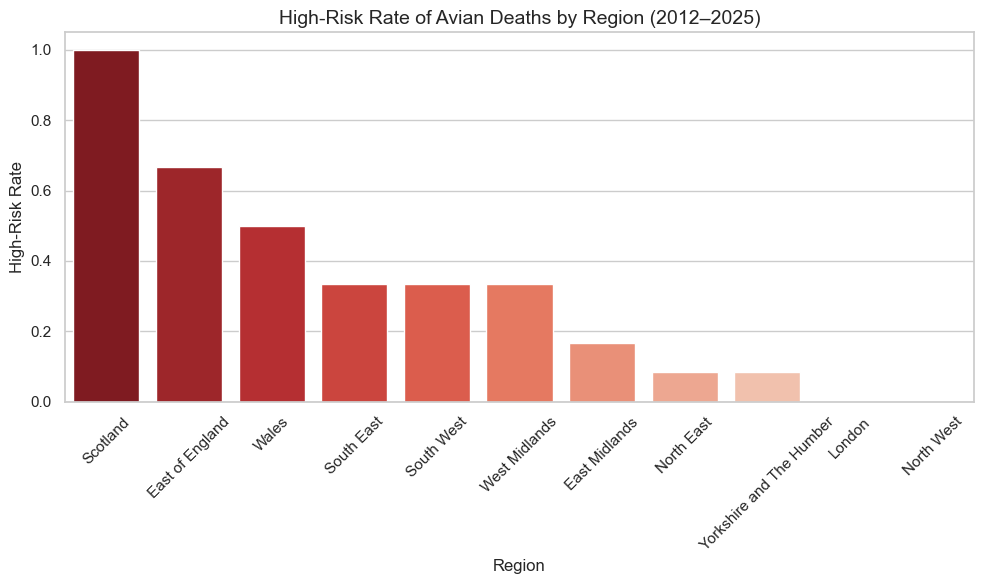

In [237]:
sns.set(style="whitegrid")
# Bar plot of high-risk rate by region
plt.figure(figsize=(10, 6))
sns.barplot(data=region_risk, x="region", y="high_risk_rate", palette="Reds_r")
plt.title("High-Risk Rate of Avian Deaths by Region (2012–2025)", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("High-Risk Rate")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

,Classifier,Accuracy (%),Precision,Recall,F1 Score,AUC
0,SVM,93.94%,1.00,0.80,0.89,0.90
1,GaussianNB,100.00%,1.00,1.00,1.00,1.00
2,Random Forest Classifier,90.91%,1.00,0.70,0.82,0.85


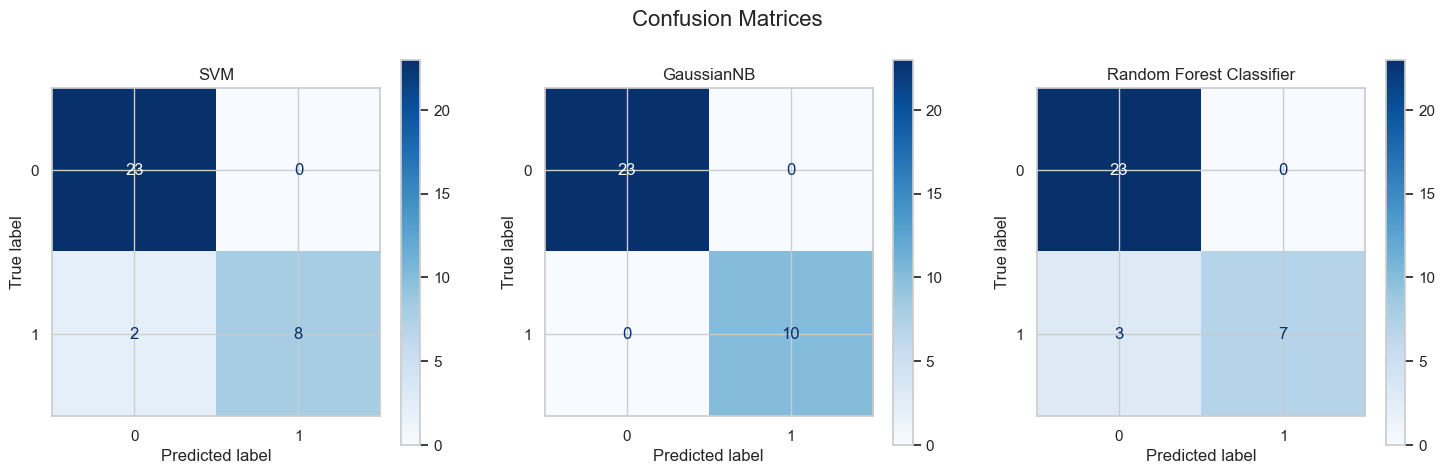

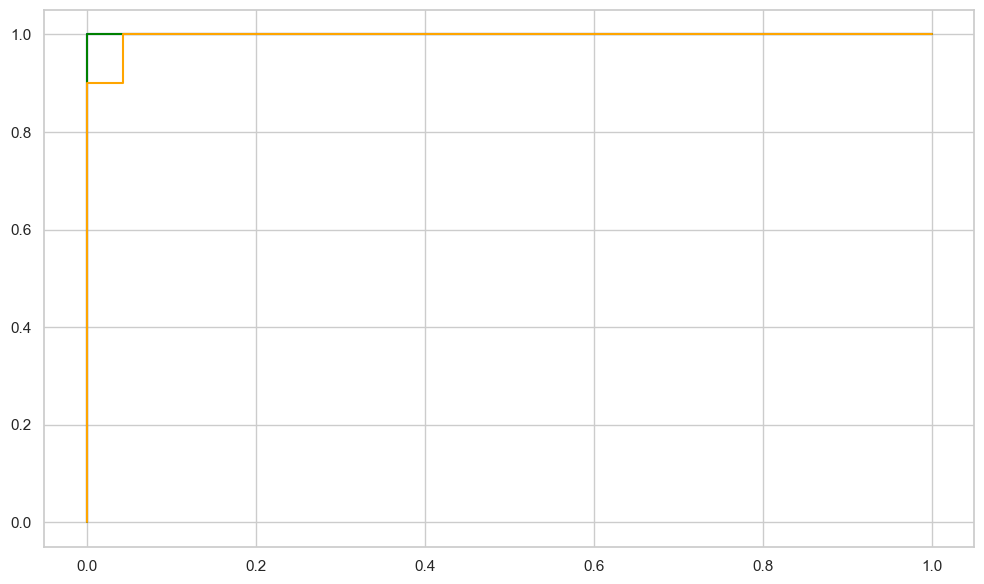

<Figure size 640x480 with 0 Axes>

C:\Users\tajdi\AppData\Local\Temp\ipykernel_22416\328540988.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importances[indices],


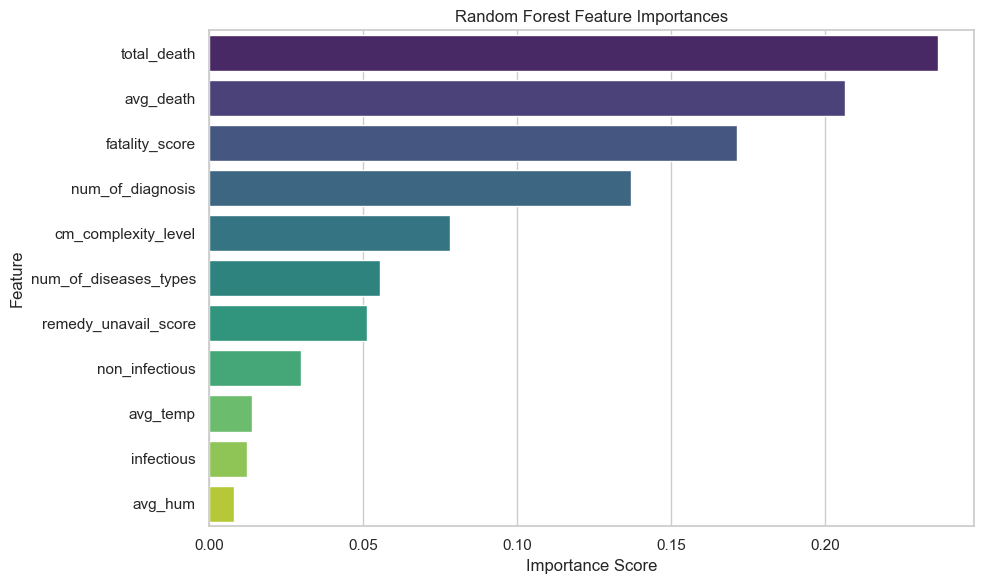

In [240]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix, 
                            roc_curve, auc, ConfusionMatrixDisplay, 
                            classification_report)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Specify classifiers to compare
classifiers = [
    ('SVM', SVC(kernel='linear')),
    ('GaussianNB', GaussianNB()),
    ('Random Forest Classifier', RandomForestClassifier(random_state=42))
]

# Initialize results storage and plots
results = []
fig_cm, axes_cm = plt.subplots(1, 3, figsize=(18, 5))
fig_roc, ax_roc = plt.subplots(figsize=(10, 6))
colors = ['blue', 'green', 'orange']
rf_importances = None

# Train and evaluate each classifier
for i, (name, clf) in enumerate(classifiers):
    # Train and predict
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Store results
    results.append({
        'Classifier': name,
        'Accuracy (%)': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'AUC': roc_auc
    })
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes_cm[i], cmap='Blues', values_format='d')
    axes_cm[i].set_title(f'{name}')
    
    # ROC Curve
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)[:, 1]
    else:
        y_score = clf.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    ax_roc.plot(fpr, tpr, color=colors[i], 
                label=f'{name} (AUC = {roc_auc:.2f})')
    
    # Feature importance for RF
    if name == "Random Forest Classifier":
        rf_importances = clf.feature_importances_

# Create and display metrics dataframe
results_df = pd.DataFrame(results)
styled_df = (results_df.style
             .format({
                 'Accuracy (%)': '{:.2f}%',
                 'Precision': '{:.2f}',
                 'Recall': '{:.2f}',
                 'F1 Score': '{:.2f}',
                 'AUC': '{:.2f}'
             })
             .set_caption('Classifier Performance Comparison')
             .background_gradient(cmap='Blues', subset=['Accuracy (%)', 'Precision', 'Recall', 'F1 Score', 'AUC']))
display(styled_df)

# Show confusion matrix plots
fig_cm.suptitle("Confusion Matrices", fontsize=16)
plt.tight_layout()
plt.show()

# Show ROC curve
ax_roc.plot([0, 1], [0, 1], 'k--')
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('ROC Curve Comparison')
ax_roc.legend(loc='lower right')
ax_roc.grid()
plt.tight_layout()
plt.show()

# Feature importance plot (Random Forest)
if rf_importances is not None:
    indices = rf_importances.argsort()[::-1]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=rf_importances[indices], 
                y=[feature_cols[i] for i in indices] if 'feature_cols' in globals() 
                else [f'Feature {i}' for i in indices], 
                palette="viridis")
    plt.title("Random Forest Feature Importances")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()